# Titanic Survived Project

Project Description

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Attribute Information

Passenger id- Unique Id of the passenger

Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Survived- Survived (0 = No; 1 = Yes)

Name- Name of the passenger

Sex- Sex of the passenger (Male, Female)

Age- Age of the passenger

Sibsp- Number of Siblings/Spouses Aboard

Parch- Number of Parents/Children Aboard

Ticket- Ticket Number

Fare- Passenger Fare (British pound)

Cabin- Cabin

Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)



In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import scipy.stats
import warnings
warnings.filterwarnings("ignore")

In [41]:
df=pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [42]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [43]:
df.tail(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [44]:
print("Columns :",df.columns) 
print("shape:", df.shape)
print("info:", df.info())
print("data types:", df.dtypes)    # for checking the datatypes of the columns

Columns : Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
info: None
data types: PassengerId      int64
Survived         i

In [45]:
# checking the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are null values present in three columns,first we have to remove these null values from the column age,cabin and embarked.

In [46]:
 pd.set_option('display.max_rows',None) #allow to display all rows of a DataFrame without any truncation

In [47]:
df['Age']

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
5        NaN
6      54.00
7       2.00
8      27.00
9      14.00
10      4.00
11     58.00
12     20.00
13     39.00
14     14.00
15     55.00
16      2.00
17       NaN
18     31.00
19       NaN
20     35.00
21     34.00
22     15.00
23     28.00
24      8.00
25     38.00
26       NaN
27     19.00
28       NaN
29       NaN
30     40.00
31       NaN
32       NaN
33     66.00
34     28.00
35     42.00
36       NaN
37     21.00
38     18.00
39     14.00
40     40.00
41     27.00
42       NaN
43      3.00
44     19.00
45       NaN
46       NaN
47       NaN
48       NaN
49     18.00
50      7.00
51     21.00
52     49.00
53     29.00
54     65.00
55       NaN
56     21.00
57     28.50
58      5.00
59     11.00
60     22.00
61     38.00
62     45.00
63      4.00
64       NaN
65       NaN
66     29.00
67     19.00
68     17.00
69     26.00
70     32.00
71     16.00
72     21.00
73     26.00
74     32.00
75     25.00
76       NaN

By taking median and mode,we can remove the null values in the columns

In [52]:
df['Age']=df['Age'].fillna(np.mean(df['Age']))

In [53]:
from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy='most_frequent')
df['Cabin']=imp.fit_transform(df['Cabin'].values.reshape(-1,1))
imp=SimpleImputer(strategy='most_frequent')
df['Embarked']=imp.fit_transform(df['Embarked'].values.reshape(-1,1))

In [54]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Now we have removed all the null values from the three column. There are no null values present.

In [55]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [56]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1      1
599    1
588    1
589    1
590    1
591    1
592    1
593    1
594    1
595    1
596    1
597    1
598    1
600    1
586    1
601    1
602    1
603    1
604    1
605    1
606    1
607    1
608    1
609    1
610    1
611    1
587    1
585    1
613    1
571    1
560    1
561    1
562    1
563    1
564    1
565    1
566    1
567    1
568    1
569    1
570    1
572    1
584    1
573    1
574    1
575    1
576    1
577    1
578    1
579    1
580    1
581    1
582    1
583    1
612    1
614    1
669    1
655    1
644    1
645    1
646    1
647    1
648    1
649    1
650    1
651    1
652    1
653    1
654    1
656    1
642    1
657    1
658    1
659    1
660    1
661    1
662    1
663    1
664    1
665    1
666    1
667    1
643    1
641    1
615    1
627    1
616    1
617    1
618    1
619    1
620    1
621    1
622    1
623    1
624    1
625    1
626    1
628    1
640    1
629    1
630    1
631    1
632    1
633    1
634    1
635    1
636    1
637    1
638    1
639    1
559    1
5

In [57]:
df.set_index('PassengerId', inplace=True)

In [58]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,B96 B98,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,B96 B98,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,B96 B98,S


In [59]:
df.shape

(891, 11)

Encoding Technique

In [60]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [61]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,108.0,1.0,22.000000,1,0,523.0,7.2500,47.0,2.0
2,1,1,190.0,0.0,38.000000,1,0,596.0,71.2833,81.0,0.0
3,1,3,353.0,0.0,26.000000,0,0,669.0,7.9250,47.0,2.0
4,1,1,272.0,0.0,35.000000,1,0,49.0,53.1000,55.0,2.0
5,0,3,15.0,1.0,35.000000,0,0,472.0,8.0500,47.0,2.0
6,0,3,554.0,1.0,29.699118,0,0,275.0,8.4583,47.0,1.0
7,0,1,515.0,1.0,54.000000,0,0,85.0,51.8625,129.0,2.0
8,0,3,624.0,1.0,2.000000,3,1,395.0,21.0750,47.0,2.0
9,1,3,412.0,0.0,27.000000,0,2,344.0,11.1333,47.0,2.0


In [62]:
# describe the dataset- give the satistical summary of numerical columns
df.describe()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,445.000000,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,53.639731,1.536476
std,0.486592,0.836071,257.353842,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,23.568293,0.791503
min,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,222.500000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,47.000000,1.000000
50%,0.000000,3.000000,445.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,47.000000,2.000000
75%,1.000000,3.000000,667.500000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,47.000000,2.000000
max,1.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,146.000000,2.000000


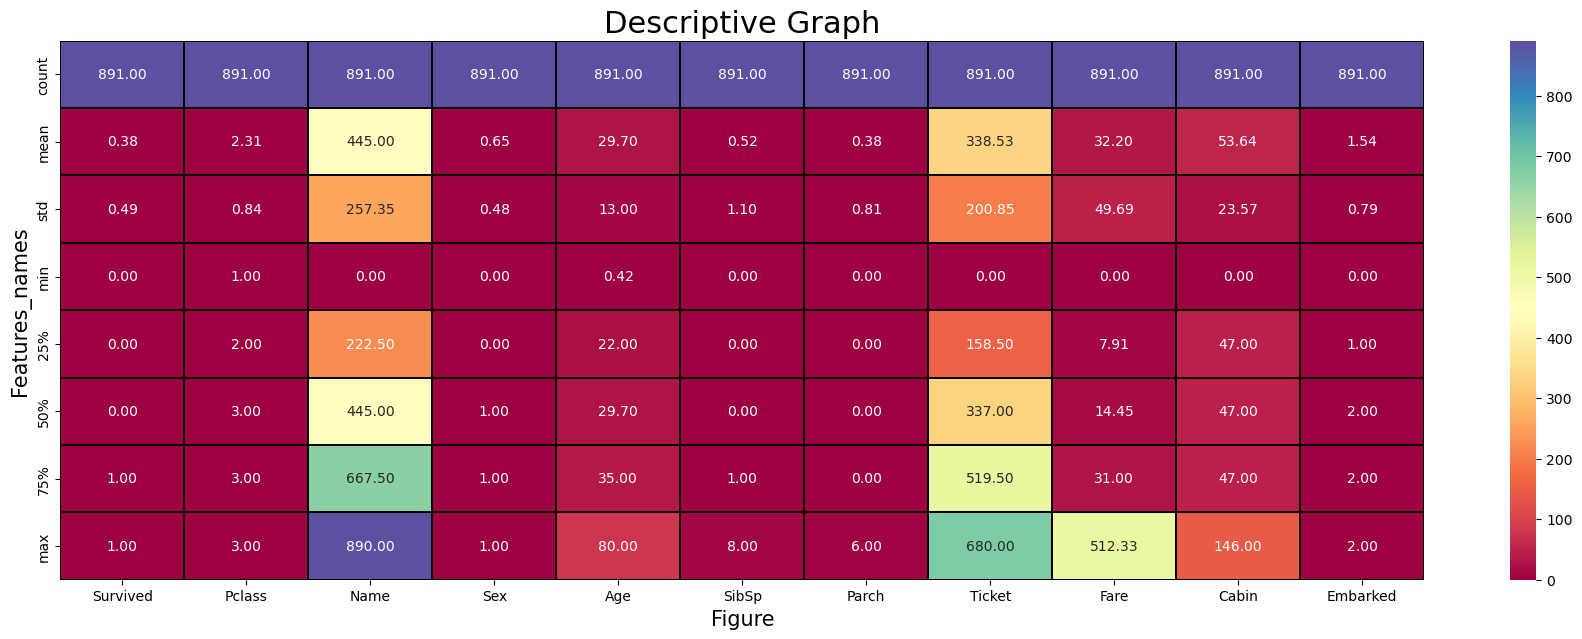

In [63]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=15)
plt.ylabel('Features_names',fontsize=15)
plt.title('Descriptive Graph',fontsize=22)
plt.show()

1. outliers are present in name (object data type), Age (float) , SibSp(categorical), Parch (categorical), Ticket (object), Fare (float) and Cabin (object) because of more difference between 75% and max.
2. mean> median in  SibSp(categorical),Parch(categorical),Cabin (object) and Ticket(Object) are there, so positive skewness is present in these columns.
3. median> mean in Pclass(categorical), Sex(categorical), Fare (float) and Embarked(object) are there, so negative skewness is present in these columns.
4. A little bit positive skewness also present in target variable because of mean (.38)> median (0).

In [64]:
df.corr()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,1.000000,-0.338481,-0.057343,-0.543351,-0.069809,-0.035322,0.081629,-0.164549,0.257307,0.175690,-0.167675
Pclass,-0.338481,1.000000,0.052831,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500,-0.248495,0.162098
Name,-0.057343,0.052831,1.000000,0.020314,0.057466,-0.017230,-0.049105,0.047348,-0.049173,0.034129,-0.006117
Sex,-0.543351,0.131900,0.020314,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333,-0.102643,0.108262
Age,-0.069809,-0.331339,0.057466,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566,0.056011,-0.026749
SibSp,-0.035322,0.083081,-0.017230,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651,-0.005539,0.068230
Parch,0.081629,0.018443,-0.049105,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225,0.022682,0.039798
Ticket,-0.164549,0.319869,0.047348,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885,-0.072200,-0.001729
Fare,0.257307,-0.549500,-0.049173,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000,0.090516,-0.224719
Cabin,0.175690,-0.248495,0.034129,-0.102643,0.056011,-0.005539,0.022682,-0.072200,0.090516,1.000000,0.023804


<Axes: >

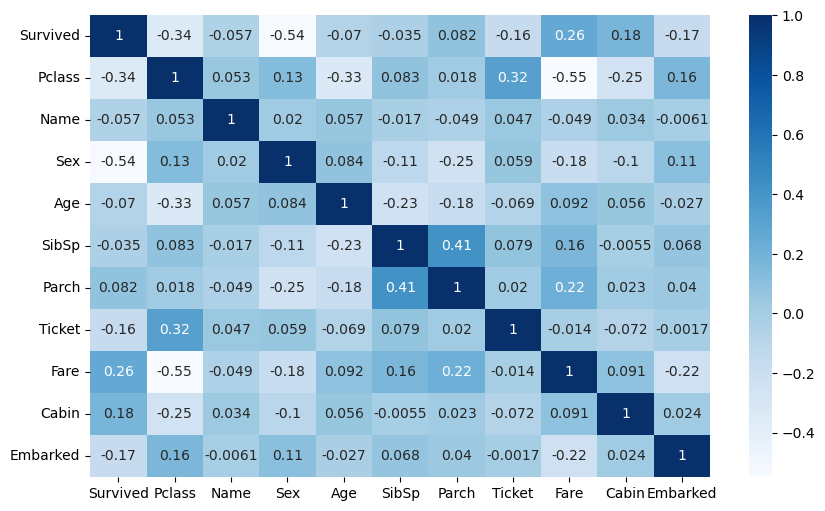

In [65]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="Blues", annot=True)

In [66]:
corrmatrix=df.corr()
corrmatrix['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Cabin       0.175690
Parch       0.081629
SibSp      -0.035322
Name       -0.057343
Age        -0.069809
Ticket     -0.164549
Embarked   -0.167675
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

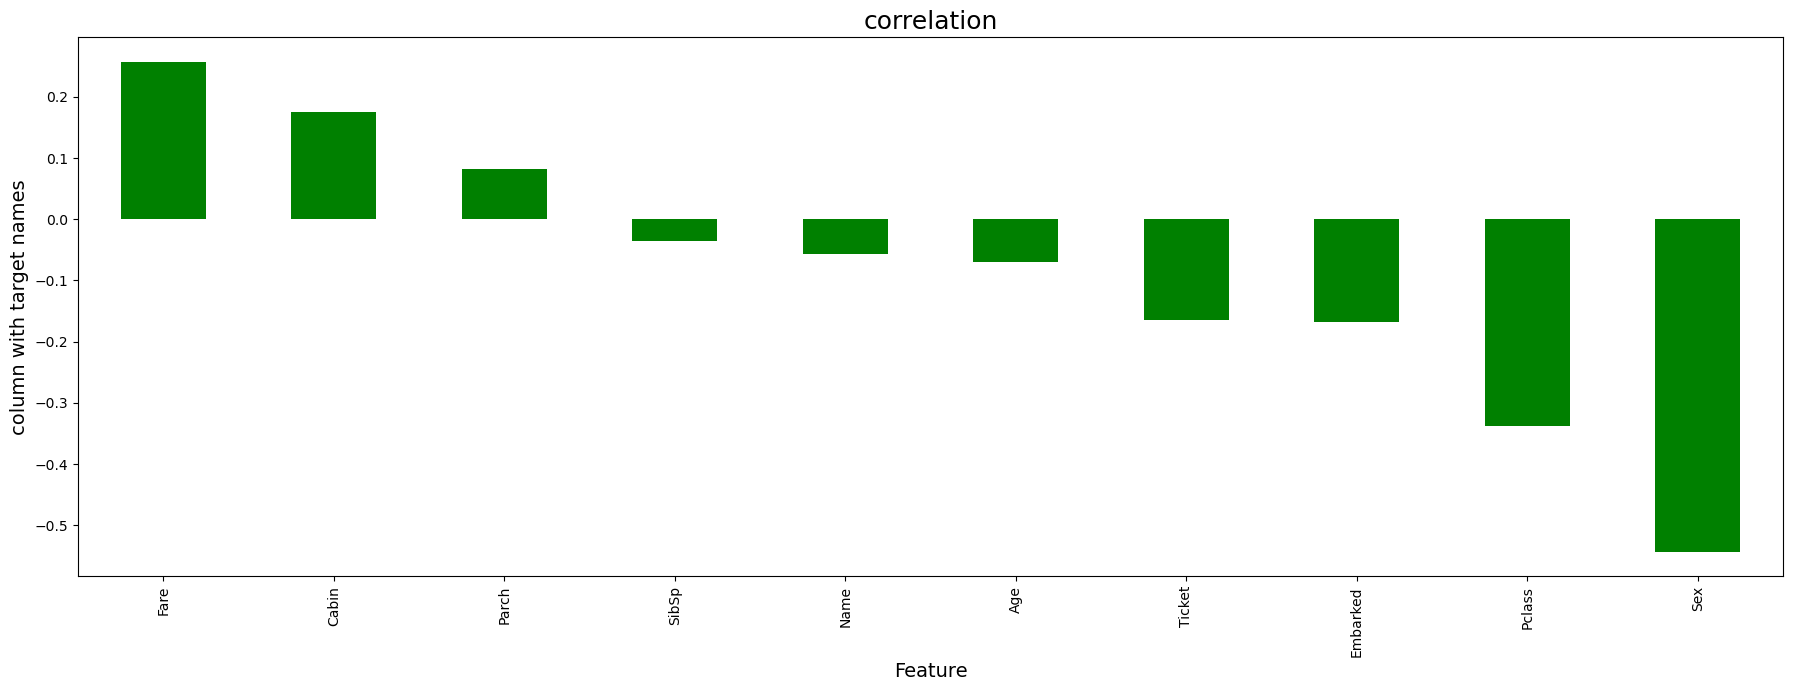

In [67]:
plt.figure(figsize=(22,7))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='green')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [68]:
#Separating the independent and target variable in x and y
x=df.drop('Survived',axis=1)
y=df['Survived']

In [70]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Name        0.000000
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Ticket      0.000246
Fare        4.787317
Cabin       2.268926
Embarked   -1.264823
dtype: float64

Keeping -/+0.5 as the range for skewness,here are the columns which does not lie within this range.

Pclass-Categorical

Sex-Categorical(object datatype)

SibSp-Categorical

Parch-Categorical 

Cabin-object datatype 

Embarked-object datatype 

Fare-Float type

We will only remove skewness from column'Fare' as it is float type

In [72]:
#Removing the skewness from fare column by using cube root
df["Fare"]=np.cbrt(df["Fare"])

In [73]:
#Again checking the skewness
df.skew()

Survived    0.478523
Pclass     -0.630548
Name        0.000000
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Ticket      0.000246
Fare        1.230382
Cabin       2.268926
Embarked   -1.264823
dtype: float64

Fare did not come in the range +/-0.5 after applying the cuberoot.but little bit skewness is reduced.

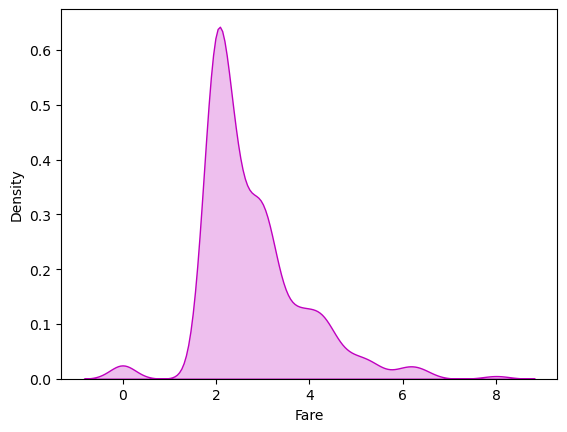

In [74]:
sns.distplot(df['Fare'],color="m",kde_kws={"shade":True},hist=False)
plt.show()

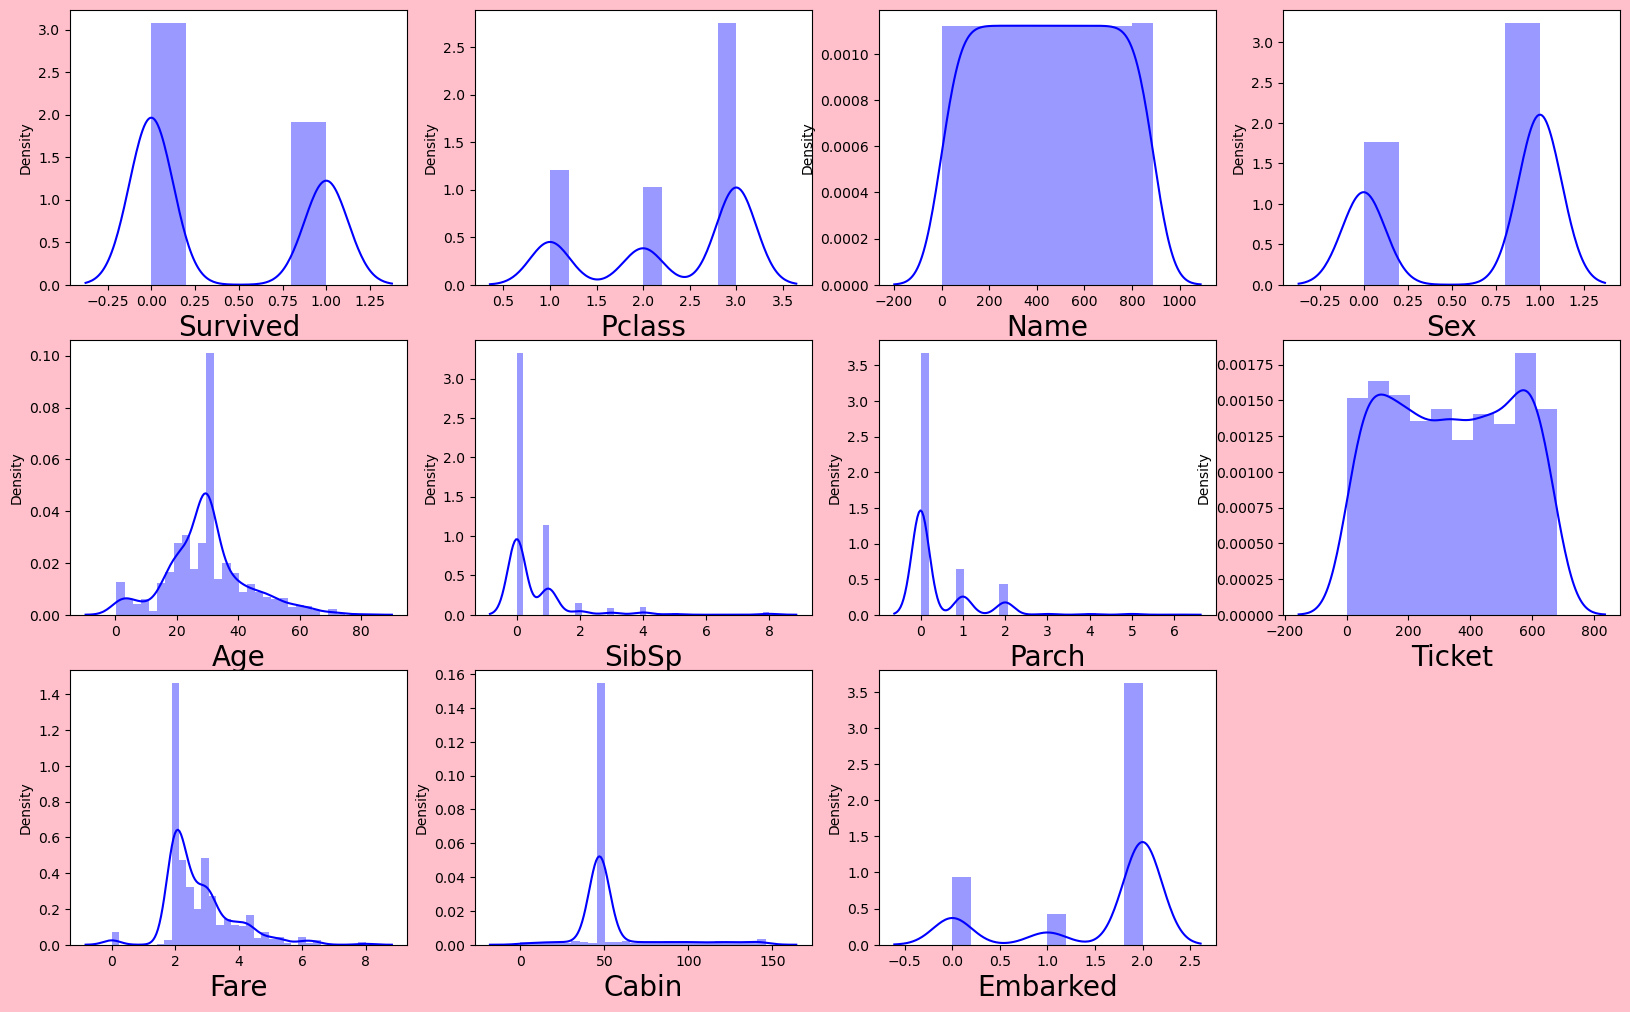

In [77]:
plt.figure(figsize=(20,25), facecolor="pink")
p=1
for column in df:
    if p<=18:
        ax=plt.subplot(6,4,p)
        sns.distplot(df[column],color="b")
        plt.xlabel(column,fontsize=20)
    p=p+1
plt.show()

<Axes: >

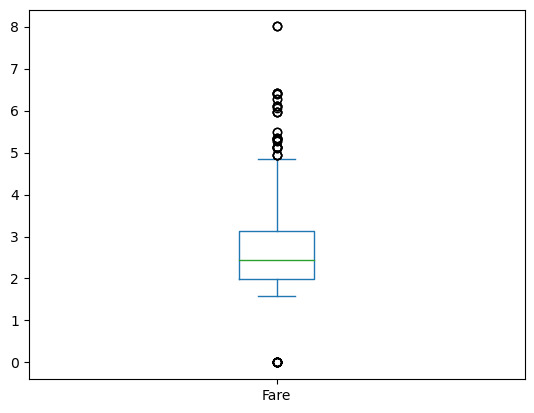

In [83]:
# Lets check the outliers by plotting boxplot
df["Fare"].plot.box()

<Axes: >

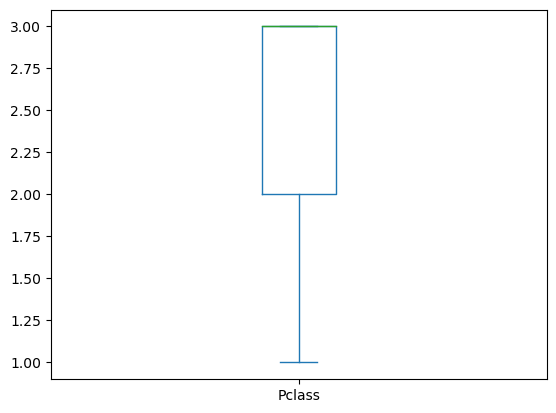

In [84]:
df["Pclass"].plot.box()

<Axes: >

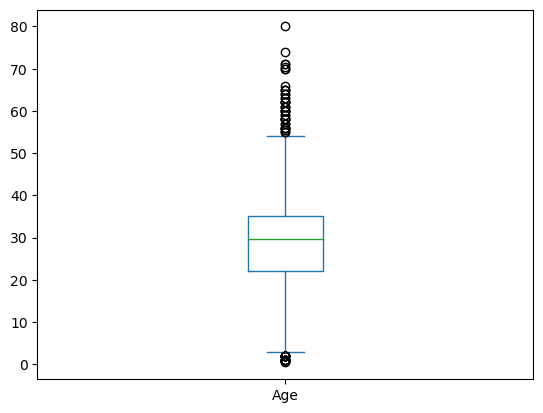

In [85]:
df["Age"].plot.box()

<Axes: >

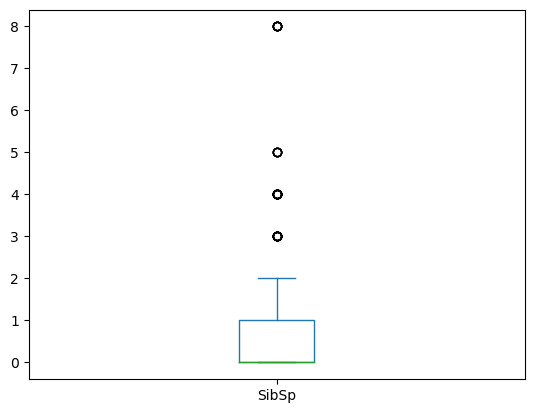

In [86]:
df["SibSp"].plot.box()

<Axes: >

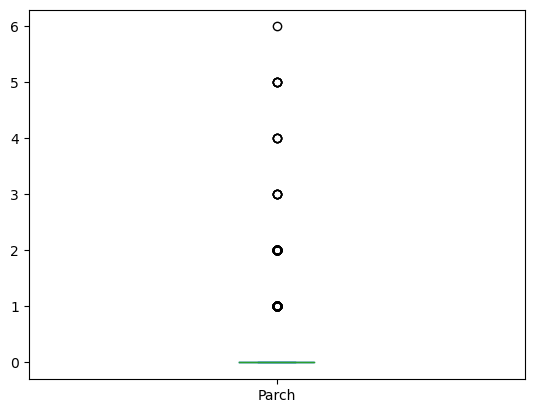

In [87]:
df["Parch"].plot.box()

<Axes: >

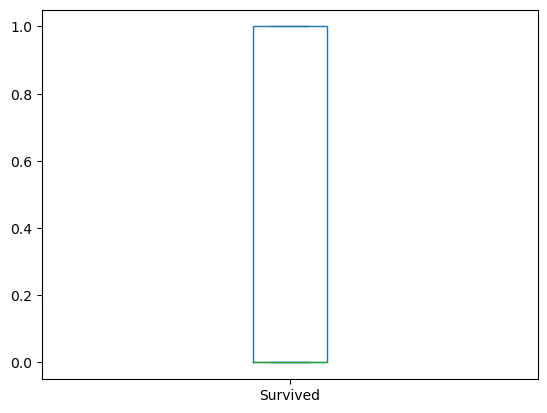

In [88]:
df["Survived"].plot.box()

# Removing the Outliers

In [ ]:
#from scipy.stats import zscore

# removing the outliers
#z=np.abs(zscore(df))
#z
#threshold=3
#print(np.where(z>3))
#df_new=df[(z<3).all(axis=1)]
#df_new

#df_new.shape------> (790, 11)

# data loss percentage
#print("Data Loss Percentage",((df.shape[0]-df_new.shape[0])/df.shape[0])*100)---Data Loss Percentage 11.335578002244668

Approx 12% data loss is not acceptable. so we will proceed without removing the outliers.

In [100]:
x1=df.drop("Survived",axis=1)
y1=df["Survived"]

# Feature Scaling using Standard Scalarization

In [102]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x1=pd.DataFrame(scaler.fit_transform(x1),columns=x1.columns)
x1


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.827377,-1.310217e+00,0.737695,-5.924806e-01,0.432793,-0.473674,0.918966,-0.774708,-0.281881,0.585954
1,-1.566107,-9.914102e-01,-1.355574,6.387890e-01,0.432793,-0.473674,1.282625,1.287903,1.161545,-1.942303
2,0.827377,-3.576852e-01,-1.355574,-2.846632e-01,-0.474545,-0.473674,1.646283,-0.720325,-0.281881,0.585954
3,-1.566107,-6.726038e-01,-1.355574,4.079260e-01,0.432793,-0.473674,-1.442322,0.926230,0.057748,0.585954
4,0.827377,-1.671790e+00,0.737695,4.079260e-01,-0.474545,-0.473674,0.664904,-0.710596,-0.281881,0.585954
5,0.827377,4.237793e-01,0.737695,-2.232906e-16,-0.474545,-0.473674,-0.316475,-0.679505,-0.281881,-0.678175
6,-1.566107,2.721518e-01,0.737695,1.870059e+00,-0.474545,-0.473674,-1.262983,0.898775,3.199324,0.585954
7,0.827377,6.959311e-01,0.737695,-2.131568e+00,2.247470,0.767630,0.281319,-0.003387,-0.281881,0.585954
8,0.827377,-1.283001e-01,-1.355574,-2.077088e-01,-0.474545,2.008933,0.027256,-0.497169,-0.281881,0.585954
9,-0.369365,5.093127e-01,-1.355574,-1.208115e+00,0.432793,-0.473674,-1.028847,0.320781,-0.281881,-1.942303


# Checking VIF (Variance Inflation Factor)

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif["Features"]=x1.columns
vif

,VIF Values,Features
0,2.658707,Pclass
1,1.014923,Name
2,1.127886,Sex
3,1.215947,Age
4,1.413966,SibSp
5,1.386385,Parch
6,1.163140,Ticket
7,2.635852,Fare
8,1.081164,Cabin
9,1.094962,Embarked


we don't drop any column because there are not any column which has threshold value greater than vif.

# Finding the random state

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predLR=LR.predict(x_test)
    acc=accuracy_score(y_test,predLR)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is',maxAccu,'on Random_state',maxRS)

Best accuracy is 0.8619402985074627 on Random_state 6


In [112]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=6)

In [116]:

from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score

etc=ExtraTreeClassifier()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
svc=SVC()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()


In [117]:
model=[LR,etc,dtc,rfc,svc,gbc,abc,bc]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracyscore:of',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print("-------------------------------------------")

accuracyscore:of LogisticRegression()
0.8619402985074627
[[160  14]
 [ 23  71]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       174
           1       0.84      0.76      0.79        94

    accuracy                           0.86       268
   macro avg       0.85      0.84      0.84       268
weighted avg       0.86      0.86      0.86       268

-------------------------------------------
accuracyscore:of ExtraTreeClassifier()
0.7985074626865671
[[139  35]
 [ 19  75]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       174
           1       0.68      0.80      0.74        94

    accuracy                           0.80       268
   macro avg       0.78      0.80      0.79       268
weighted avg       0.81      0.80      0.80       268

-------------------------------------------
accuracyscore:of DecisionTreeClassifier()
0.7611940298507462
[[134  40]
 [ 24  70]]
             

We are getting highest accuracy with Logistic Regression(86%) but we will check cross validation scores.

# Cross Validation Score

In [145]:

scr=cross_val_score(LR,x1,y1,cv=5)
print(scr)
print(scr.mean())
print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, predLR)-scr.mean())


[0.78212291 0.80337079 0.7752809  0.76966292 0.83707865]
0.7935032326909798
Difference between accuracy score and cross validation score is -0.24126442672083048


In [146]:
#checking the CV score for Extra Tree Classifier
scr=cross_val_score(etc,x1,y1,cv=5)
print(scr)
print(scr.mean())
print(0.7985074626865671-scr.mean())


[0.78212291 0.74157303 0.76404494 0.79213483 0.78651685]
0.7732785135898562
0.025228949096710918


In [147]:
#checking the CV score for Decision Tree Classifier
scr=cross_val_score(dtc,x1,y1,cv=5)
print(scr)
print(scr.mean())
print(0.7611940298507462-scr.mean())


[0.76536313 0.76404494 0.80337079 0.78089888 0.76404494]
0.7755445358106836
-0.014350505959937365


In [148]:
#checking the CV score for Random Forest Classifier
scr=cross_val_score(rfc,x1,y1,cv=5)
print(scr)
print(scr.mean())
print(0.8395522388059702-scr.mean())


[0.83240223 0.79213483 0.85393258 0.80898876 0.85393258]
0.8282781997363632
0.011274039069607


In [149]:
#checking the CV score for Support Vector Machine Classifier
scr=cross_val_score(svc,x1,y1,cv=5)
print(scr)
print(scr.mean())
print(0.8395522388059702-scr.mean())


[0.81005587 0.80337079 0.82022472 0.78651685 0.84269663]
0.8125729709371665
0.02697926786880367


In [150]:
#checking the CV score for Gradient Boosting Classifier
scr=cross_val_score(gbc,x1,y1,cv=5)
print(scr)
print(scr.mean())
print(0.8544776119402985-scr.mean())


[0.80446927 0.81460674 0.85393258 0.80898876 0.84831461]
0.8260623940744459
0.02841521786585255


In [151]:
#checking the CV score for Ada Boost Classifier
scr=cross_val_score(abc,x1,y1,cv=5)
print(scr)
print(scr.mean())
print(0.8432835820895522-scr.mean())


[0.81564246 0.81460674 0.84269663 0.80337079 0.84269663]
0.8238026489234824
0.019480933166069803


In [152]:
#checking the CV score for Bagging Classifier
scr=cross_val_score(bc,x1,y1,cv=5)
print(scr)
print(scr.mean())
print(0.8208955223880597-scr.mean())

[0.81564246 0.75842697 0.84269663 0.82022472 0.85955056]
0.8193082669010107
0.0015872554870490774


The difference between accuracy score and cross validation score is .00158 in Bagging Classifier model. It is the minimum difference,so the best model is Bagging Classifier.

# Hyperparameter Tunning

In [155]:
from sklearn.model_selection import GridSearchCV

In [165]:
parameters = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

GCV = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),n_estimators = 100, max_features = 0.5), parameters)
GCV.fit(x_train, y_train)

GridSearchCV(estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         max_features=0.5, n_estimators=100),
             param_grid={'base_estimator__max_depth': [1, 2, 3, 4, 5],
                         'max_samples': [0.05, 0.1, 0.2, 0.5]})

In [166]:
GCV.best_params_

{'base_estimator__max_depth': 5, 'max_samples': 0.5}

In [167]:
predGCV=GCV.best_estimator_.predict(x_test)

In [168]:
accuracy_score(y_test,predGCV)

0.8395522388059702

The accuracy of the model is increased by 1%.

In [169]:
import joblib
joblib.dump(GCV.best_estimator_,'Titanicbc.pkl')

['Titanicbc.pkl']

In [170]:
loaded_model=joblib.load('Titanicbc.pkl')
prediction=loaded_model.predict(x_test)

In [171]:
prediction

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0])